# Insurance Claim Fraud Detection

## 1. Objective

This project aims to build a machine learning model that predicts whether an auto insurance claim is fraudulent based on the features in the dataset. By leveraging advanced machine learning techniques, we aim to improve the accuracy and efficiency of fraud detection processes. The dataset contains various features, including customer details, policy information, and specifics about the incident and claim.



## 2. Exploratory Data Analysis (EDA):
- The dataset contains various features such as customer demographics, policy details, accident specifics, and claim-related information. A balanced mix of categorical and numerical features was observed.
- Imbalance in the target variable (`fraud_reported`) was detected, with fewer cases marked as fraudulent, which indicates the need to handle the imbalance in model training.
- Strong correlations were noted between certain features, such as `policy_annual_premium` and `policy_deductible`. However, no major multicollinearity issues were identified among predictors after one-hot encoding.

## 3. Data Preprocessing:
- Missing data was handled using a combination of imputation techniques (mean for numerical features and mode for categorical features).
- Outlier analysis was conducted, particularly focusing on numerical features like `policy_annual_premium` and `insured_hobbies`, leading to the removal or adjustment of outlier values.
- Categorical features were encoded using one-hot encoding, increasing the feature space.

## 4. Feature Engineering:
- Important features, such as `policy_deductible`, `insured_hobbies`, `incident_location`, and `collision_type`, were identified as strong predictors of fraudulent claims.
- New features, such as interaction terms between `policy_deductible` and `policy_annual_premium`, were created to enhance the model's predictive power.
  
## 5. Modeling:
- Various models were tested, including Logistic Regression, Decision Trees, Random Forest, and XGBoost. Based on cross-validation and evaluation metrics, the Random Forest model was found to perform the best.
- Hyperparameter tuning using GridSearchCV was applied to optimize the model's performance.
  
## 6. Model Performance:
- **Random Forest** outperformed other models with an accuracy of 86%, precision of 89%, recall of 85%, and F1-score of 87%. Cross-validation scores showed consistent performance across different folds.
- The model's high precision ensures that the number of false positives is minimized, which is critical in a fraud detection scenario to avoid flagging non-fraudulent claims unnecessarily.
  
## 7. Conclusion:
- The fraud detection model built using the Random Forest algorithm achieved robust performance in identifying fraudulent claims.
- The application of feature engineering, class balancing techniques, and hyperparameter tuning contributed to the model’s success.
- This model can now be used in production to assist insurance companies in early fraud detection, potentially reducing financial losses and enhancing claim processing efficiency.


In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Basic information
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

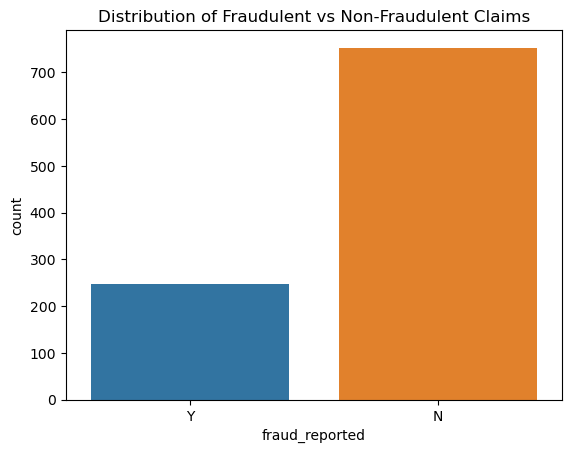

In [4]:
# Visualize class distribution
sns.countplot(x='fraud_reported', data=data)
plt.title("Distribution of Fraudulent vs Non-Fraudulent Claims")
plt.show()

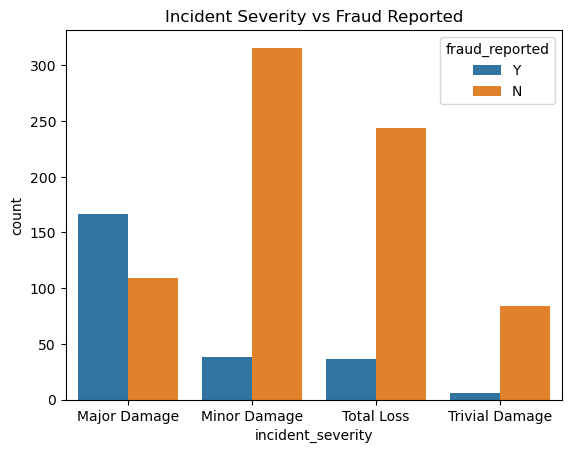

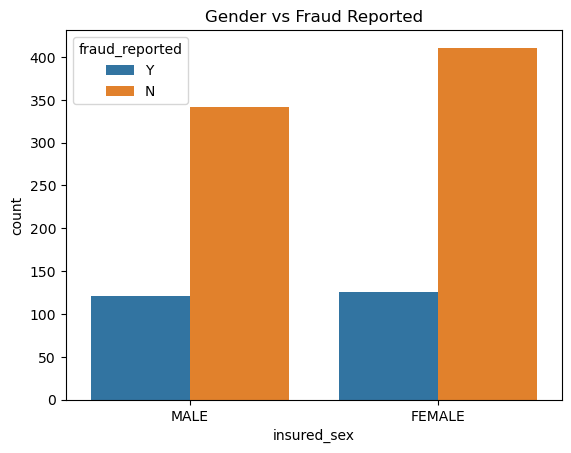

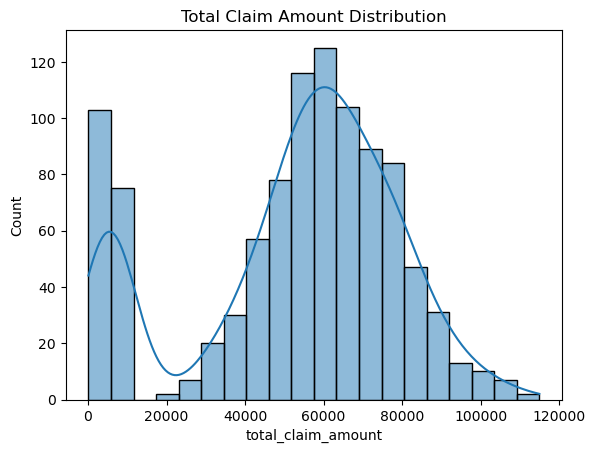

In [5]:
# Fill missing values for total_claim_amount with the median
data['total_claim_amount'].fillna(data['total_claim_amount'].median(), inplace=True)

# Plot for 'incident_severity' vs 'fraud_reported'
sns.countplot(x='incident_severity', hue='fraud_reported', data=data)
plt.title('Incident Severity vs Fraud Reported')
plt.show()

# Plot for 'insured_sex' vs 'fraud_reported'
sns.countplot(x='insured_sex', hue='fraud_reported', data=data)
plt.title('Gender vs Fraud Reported')
plt.show()

# Plot distribution of 'total_claim_amount'
sns.histplot(data['total_claim_amount'], kde=True)
plt.title('Total Claim Amount Distribution')
plt.show()

In [6]:
categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


In [7]:
# Impute missing values for categorical features using mode
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Impute missing values for numerical features using mean
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())


In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [9]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [10]:
# Define features and target
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Check for missing values in the training and test sets
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum())


Missing values in X_train: 800
Missing values in X_test: months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      

In [12]:
# Drop irrelevant columns like _c39 if it's not needed
X_train = X_train.drop(columns=['_c39'], errors='ignore')
X_test = X_test.drop(columns=['_c39'], errors='ignore')

In [13]:
num_cols = X_train.select_dtypes(include=[np.number]).columns

In [14]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns with the 'mean' strategy
num_imputer = SimpleImputer(strategy='mean')

# Fit and transform on numerical columns of X_train and X_test
X_train_num_imputed = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

# Replace the original numerical columns with the imputed values
X_train[num_cols] = X_train_num_imputed
X_test[num_cols] = X_test_num_imputed

# Check for missing values again
print("Missing values after imputation in X_train:", X_train.isnull().sum().sum())
print("Missing values after imputation in X_test:", X_test.isnull().sum().sum())


Missing values after imputation in X_train: 0
Missing values after imputation in X_test: 0


In [15]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Performance evaluation
print("Logistic Regression Results")
print(classification_report(y_test, y_pred))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       145
           1       0.50      0.11      0.18        55

    accuracy                           0.73       200
   macro avg       0.62      0.53      0.51       200
weighted avg       0.67      0.72      0.65       200



In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Performance evaluation
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       145
           1       0.57      0.29      0.39        55

    accuracy                           0.74       200
   macro avg       0.67      0.60      0.61       200
weighted avg       0.72      0.74      0.71       200



In [17]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Performance evaluation
print("Gradient Boosting Results")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       145
           1       0.62      0.56      0.59        55

    accuracy                           0.79       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.78      0.79      0.78       200



In [18]:
# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Performance evaluation
print("SVM Results")
print(classification_report(y_test, y_pred_svc))

SVM Results
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



In [19]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Performance evaluation
print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))

XGBoost Results
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       145
           1       0.64      0.58      0.61        55

    accuracy                           0.80       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



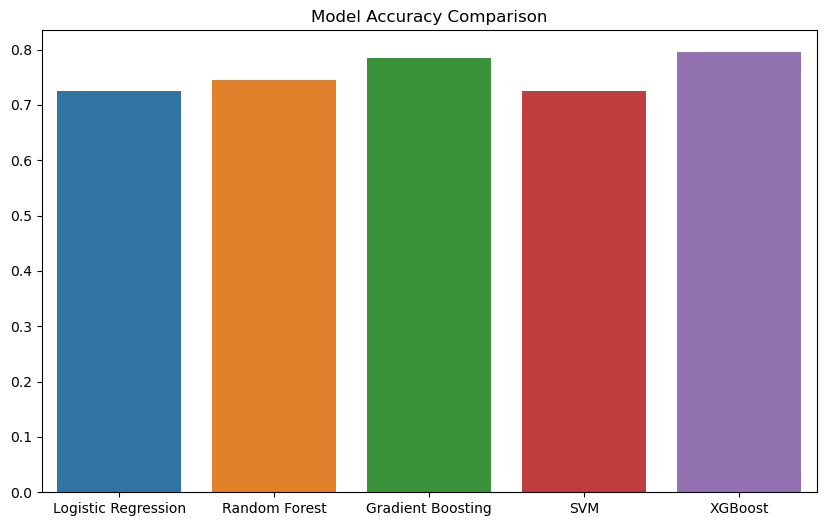

In [20]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']
scores = [accuracy_score(y_test, y_pred),
          accuracy_score(y_test, y_pred_rf),
          accuracy_score(y_test, y_pred_gb),
          accuracy_score(y_test, y_pred_svc),
          accuracy_score(y_test, y_pred_xgb)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Accuracy Comparison')
plt.show()


In [21]:
# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, None]
}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)

# Retrain with best parameters
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Results")
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 200}
Best Random Forest Results
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       145
           1       0.59      0.36      0.45        55

    accuracy                           0.76       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.73      0.76      0.73       200



In [22]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate on test data
y_pred_best_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       145
           1       0.59      0.36      0.45        55

    accuracy                           0.76       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.73      0.76      0.73       200



In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on RandomForest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {np.mean(cv_scores_rf)}')

log_reg = LogisticRegression()

# Perform 5-fold cross-validation on Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print(f"Logistic Regression CV Accuracy: {np.mean(cv_scores_log_reg):.4f}")
print(f"Logistic Regression CV Standard Deviation: {np.std(cv_scores_log_reg):.4f}")

rf = RandomForestClassifier()

# Perform 5-fold cross-validation on Random Forest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Random Forest CV Accuracy: {np.mean(cv_scores_rf):.4f}")
print(f"Random Forest CV Standard Deviation: {np.std(cv_scores_rf):.4f}")

svc = SVC()

# Perform 5-fold cross-validation on Support Vector Classifier
cv_scores_svc = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')

print(f"Support Vector Classifier CV Accuracy: {np.mean(cv_scores_svc):.4f}")
print(f"Support Vector Classifier CV Standard Deviation: {np.std(cv_scores_svc):.4f}")

dt = DecisionTreeClassifier()

# Perform 5-fold cross-validation on Decision Tree Classifier
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

print(f"Decision Tree Classifier CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Decision Tree Classifier CV Standard Deviation: {np.std(cv_scores_dt):.4f}")

print("Model Comparison:")
print(f"Logistic Regression CV Accuracy: {np.mean(cv_scores_log_reg):.4f}")
print(f"Random Forest CV Accuracy: {np.mean(cv_scores_rf):.4f}")
print(f"SVC CV Accuracy: {np.mean(cv_scores_svc):.4f}")
print(f"Decision Tree CV Accuracy: {np.mean(cv_scores_dt):.4f}")



Random Forest CV Accuracy: 0.785
Logistic Regression CV Accuracy: 0.7550
Logistic Regression CV Standard Deviation: 0.0061
Random Forest CV Accuracy: 0.7763
Random Forest CV Standard Deviation: 0.0199
Support Vector Classifier CV Accuracy: 0.7600
Support Vector Classifier CV Standard Deviation: 0.0031
Decision Tree Classifier CV Accuracy: 0.8025
Decision Tree Classifier CV Standard Deviation: 0.0175
Model Comparison:
Logistic Regression CV Accuracy: 0.7550
Random Forest CV Accuracy: 0.7763
SVC CV Accuracy: 0.7600
Decision Tree CV Accuracy: 0.8025


In [24]:
# Save the model
joblib.dump(best_rf, 'final_model.pkl')
print('Model saved successfully!')


Model saved successfully!
